# IQ Signal Analyzer
Looks for dropped samples across enabled channels

In [1]:
import numpy as np
import matplotlib.pyplot as plt

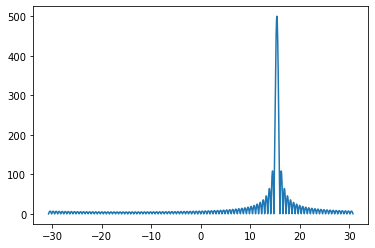

RX1
Index  Q     I
----------------
[ 0]   500    0
[ 1]     0  500
[ 2]  -500    0
[ 3]     0 -500
[ 4]   500    0
[ 5]     0  500
[ 6]  -500    0
[ 7]     0 -500
[ 8]   500    0
[ 9]     0  500
[10]  -500    0
[11]     0 -500


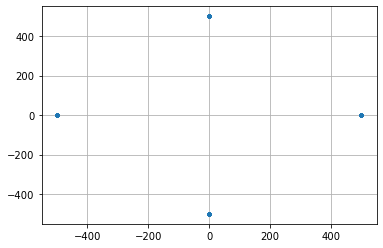

In [2]:
n=4096
samp_rate = 61.44e6
file = './build/result.bin'

samples = np.fromfile(file, np.int16).astype(np.float32).view(np.complex64)
freq = np.fft.fftfreq(n, 1/samp_rate)
freq = np.fft.fftshift(freq)
fft_rx1 = np.fft.fft(samples, n)
fft_rx1 = np.fft.fftshift(fft_rx1)

plt.plot(freq/1e6, np.abs(fft_rx1)/len(samples))
plt.show()

# Plot constellation to make sure it looks right
print(f"RX1")
print(f"Index  Q     I")
print(f"----------------")
for i, val in enumerate(samples):
    print(f"[{i:2.0f}]  {val.real:4.0f} {val.imag:4.0f}")
    if i > 10:
        break;

plt.plot(np.real(samples), np.imag(samples), '.')
plt.grid(True)
plt.show()

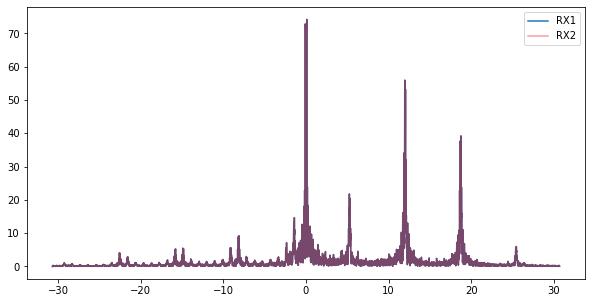

Index   Q     I
----------------
[rx1]   500    0
[rx2]   500    0
[rx1]     0  500
[rx2]     0  500
[rx1]  -500    0
[rx2]  -500    0
[rx1]     0 -500
[rx2]     0 -500
[rx1]   500    0
[rx2]   500    0
[rx1]     0  500
[rx2]     0  500
[rx1]     0  500
[rx2]     0  500
[rx1]     0  500
[rx2]     0  500
[rx1]  -500    0
[rx2]  -500    0
[rx1]     0 -500
[rx2]     0 -500
[rx1]   500    0
[rx2]   500    0


RX1                RX2
Index  Q     I     Q     I
--------------------------------
[ 0]   500    0  500    0
[ 1]     0  500    0  500
[ 2]  -500    0 -500    0
[ 3]     0 -500    0 -500
[ 4]   500    0  500    0
[ 5]     0  500    0  500
[ 6]     0  500    0  500
[ 7]     0  500    0  500
[ 8]  -500    0 -500    0
[ 9]     0 -500    0 -500
[10]   500    0  500    0
[11]     0  500    0  500


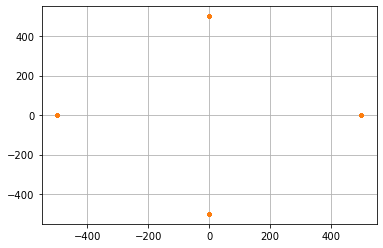

In [3]:
file = './result2.bin'
samples = np.fromfile(file, np.int16).astype(np.float32).view(np.complex64)
rx1 = samples[::2]
rx2 = samples[1::2]

n=4096
samp_rate = 61.44e6
if_supression_factor = 1
if_supression_range = 200

freq = np.fft.fftfreq(n, 1/samp_rate)
freq = np.fft.fftshift(freq)
freq_filt = (freq>-if_supression_range) & (freq < if_supression_range)

fft_rx1 = np.fft.fft(rx1, n) / len(rx1)
fft_rx1 = np.fft.fftshift(fft_rx1)
fft_rx1[freq_filt] = if_supression_factor*np.log(fft_rx1[freq_filt])

fft_rx2 = np.fft.fft(rx2, n) / len(rx2)
fft_rx2 = np.fft.fftshift(fft_rx2)
fft_rx2[freq_filt] = if_supression_factor*np.log(fft_rx2[freq_filt])

plt.figure(figsize=(10,5))
plt.plot(freq/1e6, np.abs(fft_rx1))
plt.plot(freq/1e6, np.abs(fft_rx2), alpha=0.4, color="red")
plt.legend(["RX1","RX2"])
plt.show()

# Plot constellation to make sure it looks right
print(f"Index   Q     I")
print(f"----------------")
channels = ["rx1", "rx2"]
for i, val in enumerate(samples[::1]):
    print(f"[{channels[i%2]}]  {val.real:4.0f} {val.imag:4.0f}")
    if i > 20:
        print(f"\n")
        break;

print(f"RX1                RX2")
print(f"Index  Q     I     Q     I")
print(f"--------------------------------")
for i in range(0,len(rx1)):
    print(f"[{i:2.0f}]  {rx1[i].real:4.0f} {rx1[i].imag:4.0f} {rx2[i].real:4.0f} {rx2[i].imag:4.0f}")
    if i > 10:
        break;
        
plt.plot(np.real(rx1), np.imag(rx1), '.')
plt.plot(np.real(rx2), np.imag(rx2), '.')
plt.grid(True)
plt.show()